In [20]:
# %%
import pandas as pd
import numpy as np
from PIL import Image
import re
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from string import punctuation
from gensim.models import KeyedVectors
import pytesseract

import pickle

# %%
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
from  tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import tensorflow as tf
from utils import clean_text

In [37]:
import pickle
dataset = pickle.load(open("Data\dataset_v2.pk", "rb" ))

In [38]:
X_img_val = dataset["X_img_val"]
X_text_val = dataset["X_text_val"]
Y_val = dataset["Y_val"] 

X_img_test = dataset["X_img_test"]
X_text_test = dataset["X_text_test"]
Y_test = dataset["Y_test"]

X_img_train = dataset["X_img_train"]
X_text_train = dataset["X_text_train"]
Y_train = dataset["Y_train"]

In [39]:
import meme_classification as mc
m,c = mc.init_model()
X_text_test = c.texts_to_sequences(X_text_test)
X_text_test = pad_sequences(X_text_test, maxlen=1601)
print('Shape of test tensor:', X_text_test.shape)


Shape of test tensor: (3000, 1601)


In [40]:
m.evaluate([X_img_test, X_text_test], Y_test, batch_size=128)

24/24 [==============================] - 195s 8s/step - loss: 0.5755 - accuracy: 0.7187


[0.5755102634429932, 0.718666672706604]

In [24]:
Y_pred = m.predict([X_img_test, X_text_test])

In [27]:
Y_pred

array([[0.3203509 ],
       [0.23599756],
       [0.33151853],
       ...,
       [0.3754971 ],
       [0.6204441 ],
       [0.34318125]], dtype=float32)

In [25]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print(roc_auc)

0.7527555736123102


In [28]:
y_pred = np.zeros(Y_pred.shape)
y_pred[Y_pred>0.5]=1
y_pred = np.array(y_pred)

In [32]:
hl = hamming_loss(Y_test,y_pred)
score = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
print("Hamming loss:", hl)
print("Accuracy Score:", score)
print("Precision:", precision)
print("F1_score:", f1)

Hamming loss: 0.2813333333333333
Accuracy Score: 0.7186666666666667
Precision: 0.5709459459459459
F1_score: 0.5457481162540366


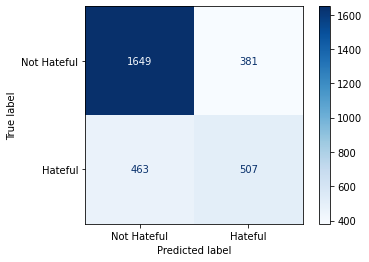

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
labels = ["Not Hateful", "Hateful"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()